In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dense, MaxPooling2D, Conv2D, Flatten, Reshape
from keras.optimizers import Adam
from keras import regularizers
from keras import optimizers
from keras import initializers
from keras.preprocessing import image

import keras.backend as K

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.patches as patches

Using TensorFlow backend.


In [8]:
# Read images
images = np.zeros((1543,260,400))

for i in range(480):
    filename = 'dataOpenedEye/openedEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i] = img

for i in range(81):
    filename = 'dataPavel/pavelEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+480] = img
    
for i in range(74):
    filename = 'dataYannick/yannickEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+561] = img

for i in range(75):
    filename = 'dataKevin/kevinEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+635] = img 

for i in range(216):
    filename = 'dataAli/aliEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+710] = img
    
for i in range(209):
    filename = 'dataMarie/marieEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+926] = img
    
for i in range(199):
    filename = 'dataHelene/heleneEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+1135] = img
       

for i in range(209):
    filename = 'dataJade/jadeEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+1334] = img

#for i in range(119):
#    filename = 'dataYoussef/youssefEye'+str(i)+'.jpg'
#    img=mpimg.imread(filename)
#    images[i+1543] = img    

    
images = np.reshape(images, (images.shape[0], images.shape[1], images.shape[2], 1))

# Rescale images
images = images/255.

images.shape

(1543, 260, 400, 1)

In [9]:
# Read target values
target1 = pd.read_csv('dataOpenedEye/dataPupilCenter.csv')
target2 = pd.read_csv('dataPavel/pavelPupilCenter.csv')
target3 = pd.read_csv('dataYannick/yannickPupilCenter.csv')
target4 = pd.read_csv('dataKevin/kevinPupilCenter.csv')
target5 = pd.read_csv('dataAli/aliPupilCenter.csv')
target6 = pd.read_csv('dataMarie/mariePupilCenter.csv')
target7 = pd.read_csv('dataHelene/helenePupilCenter.csv')
target8 = pd.read_csv('dataJade/jadePupilCenter.csv')
#target9 = pd.read_csv('dataYoussef/youssefPupilCenter.csv')
target = [target1, target2, target3, target4, target5, target6, target7, target8]#, target9]
target = pd.concat(target)

target.shape

(1543, 5)

In [10]:
# Remove missing values
images = images[target.xcentral != '?']
target = target[target.xcentral != '?']
target = target.astype('float32')
target.shape

(1472, 5)

In [11]:
# Put target data in shape
targetX = target['xcentral'].values.reshape((target['xcentral'].shape[0], 1))
targetY = target['ycentral'].values.reshape((target['ycentral'].shape[0], 1))

# Rescale targets between 0 and 1 
targetX = targetX/400.
targetY = targetY/260.

targetTrain = np.concatenate((targetX, targetY), axis=1)
targetTrain.shape

(1472, 2)

In [12]:
# Data augmentation by adding horizontal mirror images
imagesFlipped = np.flip(images, axis=2)

targetFlipped = np.zeros(targetTrain.shape)
targetFlipped[:,0] = 1-targetTrain[:,0]
targetFlipped[:,1] = targetTrain[:,1]

images = np.concatenate((images, imagesFlipped), axis=0)
targetTrain = np.concatenate((targetTrain, targetFlipped), axis=0)

In [ ]:
%matplotlib notebook
# Image to display
index=100

display = np.reshape(images[index], (260,400))
box = targetTrain[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [13]:
# Shuffle data
xtrain, ytrain = shuffle(images, targetTrain, random_state=0)
#xvalid = xtrain[1300:]
#xtrain = xtrain[:1300]
#yvalid = ytrain[1300:]
#ytrain = ytrain[:1300]

In [14]:
def model(Xshape):
    
    mod = Sequential()
    
    mod.add(Reshape((Xshape[0]*Xshape[1],), input_shape=(Xshape)))
    mod.add(Dense(64, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00)))
    mod.add(Dense(64, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.001)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.001)))
    mod.add(Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0015)))
    mod.add(Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0015)))
    mod.add(Dense(8, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.002)))
    mod.add(Dense(2, activation='sigmoid', kernel_initializer='glorot_normal'))
    
    return mod

In [15]:
mymodel = model(xtrain.shape[1:])
opt = optimizers.Adam(lr=0.0001)
mymodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [16]:
# First train with small mini batch size and default learning rate
mymodel.fit(xtrain, ytrain, epochs = 50, batch_size=64)

Epoch 1/50
2944/2944 [==============================] - 7s 2ms/step - loss: 0.1377 - acc: 0.6793
Epoch 2/50
2944/2944 [==============================] - 7s 2ms/step - loss: 0.0974 - acc: 0.7931
Epoch 3/50
2944/2944 [==============================] - 7s 2ms/step - loss: 0.0808 - acc: 0.8356
Epoch 4/50
2944/2944 [==============================] - 7s 2ms/step - loss: 0.0693 - acc: 0.8502
Epoch 5/50
2944/2944 [==============================] - 7s 2ms/step - loss: 0.0606 - acc: 0.8556
Epoch 6/50
2944/2944 [==============================] - 7s 2ms/step - loss: 0.0543 - acc: 0.8624
Epoch 7/50
2944/2944 [==============================] - 7s 2ms/step - loss: 0.0490 - acc: 0.8774
Epoch 8/50
2944/2944 [==============================] - 7s 2ms/step - loss: 0.0452 - acc: 0.8750
Epoch 9/50
2944/2944 [==============================] - 7s 2ms/step - loss: 0.0414 - acc: 0.8845
Epoch 10/50
2944/2944 [==============================] - 7s 2ms/step - loss: 0.0392 - acc: 0.8764
Epoch 11/50
2944/2944 [======

In [17]:
# Then train with smaller learning rate and larger batch size
K.set_value(mymodel.optimizer.lr, 0.0005)
mymodel.fit(xtrain, ytrain, epochs = 5, batch_size=128)
K.set_value(mymodel.optimizer.lr, 0.0001)
mymodel.fit(xtrain, ytrain, epochs = 5, batch_size=256)

Epoch 1/5
2944/2944 [==============================] - 5s 2ms/step - loss: 0.0098 - acc: 0.9497
Epoch 2/5
2944/2944 [==============================] - 5s 2ms/step - loss: 0.0097 - acc: 0.9470
Epoch 3/5
2944/2944 [==============================] - 5s 2ms/step - loss: 0.0096 - acc: 0.9450
Epoch 4/5
2944/2944 [==============================] - 5s 2ms/step - loss: 0.0096 - acc: 0.9470
Epoch 5/5
2944/2944 [==============================] - 5s 2ms/step - loss: 0.0096 - acc: 0.9463
Epoch 1/5
2944/2944 [==============================] - 4s 1ms/step - loss: 0.0095 - acc: 0.9490
Epoch 2/5
2944/2944 [==============================] - 4s 1ms/step - loss: 0.0095 - acc: 0.9474
Epoch 3/5
2944/2944 [==============================] - 4s 1ms/step - loss: 0.0095 - acc: 0.9490
Epoch 4/5
2944/2944 [==============================] - 4s 1ms/step - loss: 0.0095 - acc: 0.9480
Epoch 5/5
2944/2944 [==============================] - 4s 1ms/step - loss: 0.0095 - acc: 0.9497


In [18]:
# Make the prediction on all
ypredict = mymodel.predict(images)
#ypredict = mymodel.predict(xtrain)

X mean and stdev of diff:  -0.0003726586621031975 0.032314270185606994
Y mean and stdev of diff:  -0.0017796015296050389 0.03779858267971259


<IPython.core.display.Javascript object>


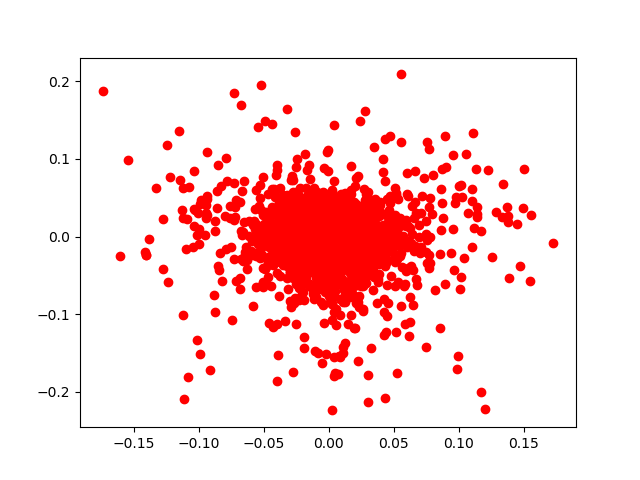

In [19]:
# Plot the diff between prediction and target values
diff = ypredict-targetTrain
#diff = ypredict-ytrain

print('X mean and stdev of diff: ', np.mean(diff[:,0]), np.std(diff[:,0]))
print('Y mean and stdev of diff: ', np.mean(diff[:,1]), np.std(diff[:,1]))

%matplotlib notebook
plt.plot(diff[:,0], diff[:,1],'ro')
plt.show()

In [ ]:
# Plot the diff between prediction and target values
#diff = ypredict-targetTrain
yvalidpred = mymodel.predict(xvalid)
diffvalid = yvalidpred-yvalid

print('X mean and stdev of diff: ', np.mean(diffvalid[:,0]), np.std(diffvalid[:,0]))
print('Y mean and stdev of diff: ', np.mean(diffvalid[:,1]), np.std(diffvalid[:,1]))

%matplotlib notebook
plt.plot(diffvalid[:,0], diffvalid[:,1],'ro')
plt.show()

In [ ]:
badpoints = np.where(diff[:,1] < -0.3)
print(badpoints)
targetTrain[badpoints]*260


In [ ]:
#%matplotlib notebook
index=163

display = np.reshape(images[index], (260,400))
box = ypredict[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [ ]:
# Make the prediction on a totally new dataset
# Read images
newImages = np.zeros((158,260,400))

for i in range(158):
    filename = 'dataYoussef/youssefEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    newImages[i] = img

        
newImages = np.reshape(newImages, (newImages.shape[0], newImages.shape[1], newImages.shape[2], 1))

# Rescale images
newImages = newImages/255.

targetValid = pd.read_csv('dataJade/jadePupilCenter.csv')

# Remove missing values
newImages = newImages[targetValid.xcentral != '?']
targetValid = targetValid[targetValid.xcentral != '?']
targetValid = targetValid.astype('float32')

# Put target data in shape
targetValidX = targetValid['xcentral'].values.reshape((targetValid['xcentral'].shape[0], 1))
targetValidY = targetValid['ycentral'].values.reshape((targetValid['ycentral'].shape[0], 1))

# Rescale targets between 0 and 1 
targetValidX = targetValidX/400.
targetValidY = targetValidY/260.

targetValid = np.concatenate((targetValidX, targetValidY), axis=1)

# Make the prediction for valid dataset
newImagesPredict = mymodel.predict(newImages)

# Plot the diff between prediction and target values
diff = newImagesPredict-targetValid

print('X mean and stdev of diff: ', np.mean(diff[:,0]), np.std(diff[:,0]))
print('Y mean and stdev of diff: ', np.mean(diff[:,1]), np.std(diff[:,1]))

%matplotlib notebook
plt.plot(diff[:,0], diff[:,1],'ro')
plt.show()

In [ ]:
badpoints = np.where(diff[:,0]<-0.05)
badpoints

In [ ]:
# Image to display
index=111

display = np.reshape(newImages[index], (260,400))
box = newImagesPredict[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()